In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv ('C:/Users/garim/Documents/Projects/Data Mining Project/ted_main.csv')
print (data.columns)
data['film_date'] = data['film_date'].apply(lambda x: dt.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
data['published_date'] = data['published_date'].apply(lambda x: dt.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')


In [15]:
#Calculating quartile ranges and mean
data = data.sort_values('views')
mid = int(len(data)/2)
k=list(data['views'])
lowerQ = np.mean(sorted(k[:mid]))
mean = np.mean(sorted(k))
upperQ = np.mean(sorted(k[mid:]))
print(lowerQ)
print(mean)
print(upperQ)

729813.14902
1698297.48157
2666781.81412


In [16]:
#Add a new column views_based
views_based=""
def views_function(data_views):
        if (data_views<lowerQ):
            views_based='Poor'
        if (data_views>lowerQ and data_views<mean):
            views_based='Moderate'
        if (data_views<upperQ and data_views>mean):
            views_based='High'
        if (data_views>upperQ):
            views_based='Very High'
        return (views_based)
data["views_based"] = data['views'].apply(views_function)

In [17]:
import ast
data['ratings'] = data['ratings'].apply(lambda x: ast.literal_eval(x))

In [18]:
#Add Topic column in the dataset
talk_topic = ""
def topic_function(data_topic):
    data_topic = sorted(data_topic, key=lambda k: k['count'])
    return data_topic[0]['name']
data['Topics']= data['ratings'].apply(topic_function)

In [19]:
pos_or_neg = ""
def pos_neg_function(rating):
    i=rating
    if (i=='Beautiful' or i=='Courageous' or i=='Funny' or i=='Informative' or i=='Ingenious' or i=='Inspiring' or i=='Jaw-dropping' or i=='Persuasive'):
        pos_or_neg='Positive'
    elif (i=='OK'):
        pos_or_neg='Neutral'
    else :
        pos_or_neg='Negative'
    return pos_or_neg
data["comment_rating"] = data['Topics'].apply(pos_neg_function)

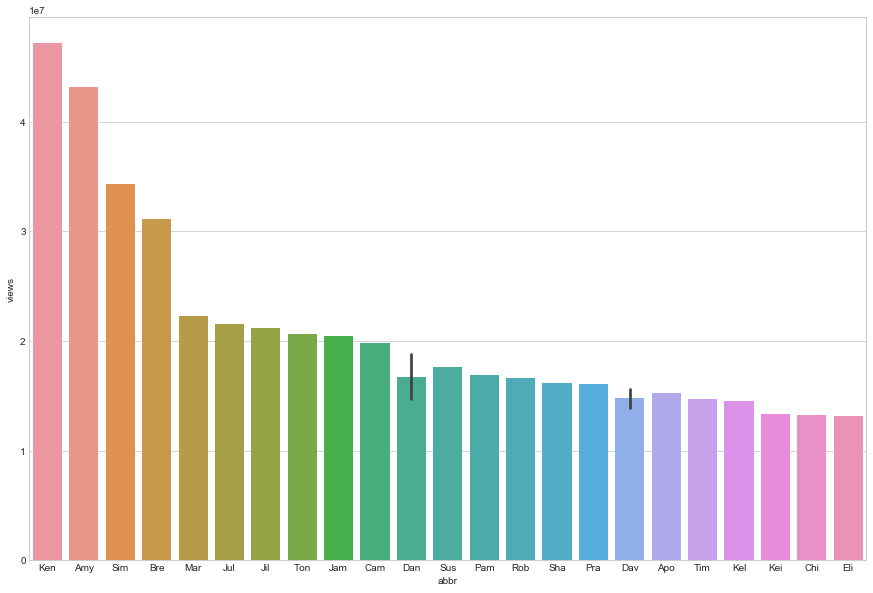

In [20]:
toptalks = data[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:25]
toptalks
toptalks['abbr'] = toptalks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x='abbr', y='views', data=toptalks)

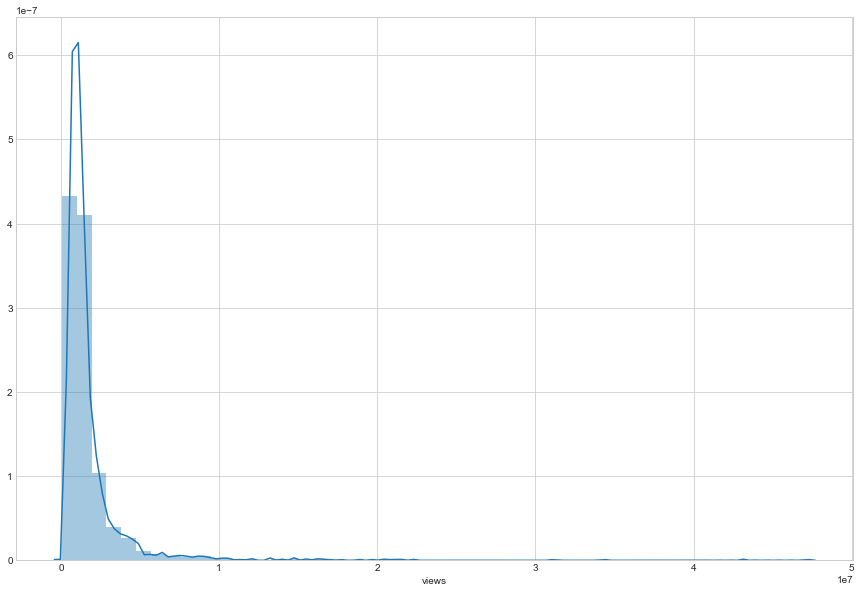

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(data['views'])

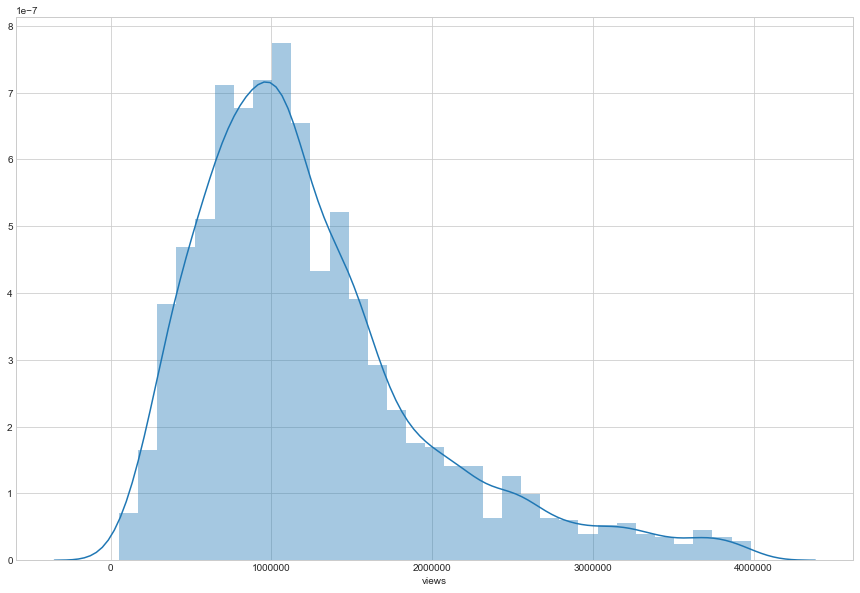

In [24]:
plt.figure(figsize=(15,10))
sns.distplot(data[data['views'] < 0.4e7]['views'])

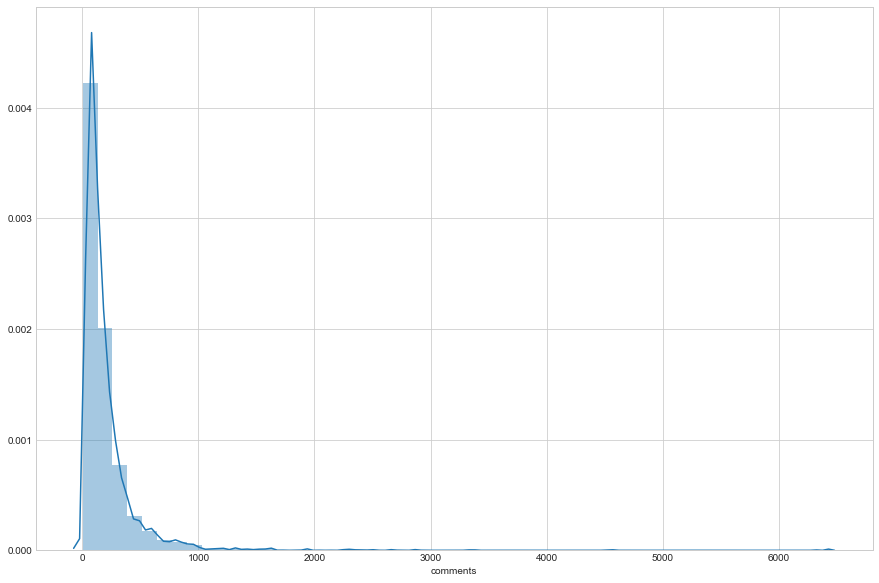

In [26]:
data['views'].describe()
data['comments'].describe()
plt.figure(figsize=(15,10))
sns.distplot(data['comments'])

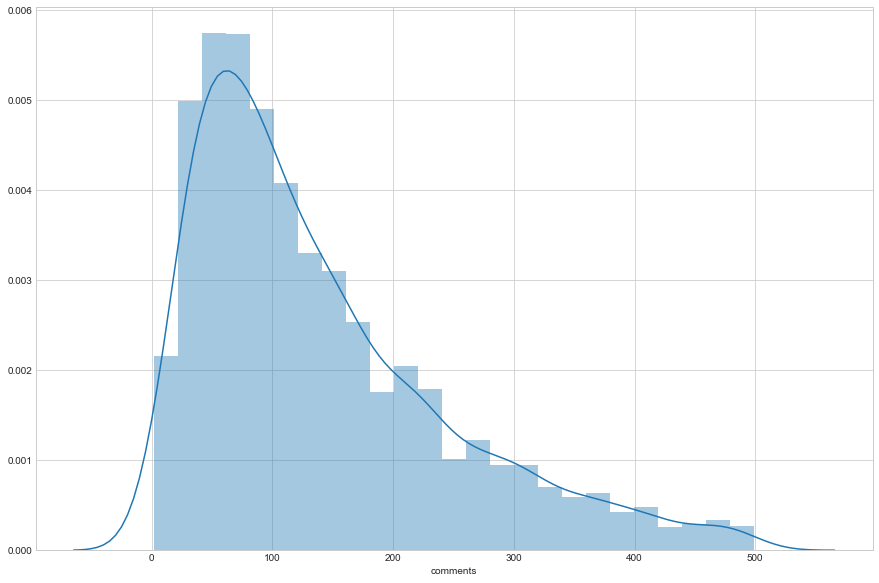

In [28]:
plt.figure(figsize=(15,10))
sns.distplot(data[data['comments'] < 500]['comments'])

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


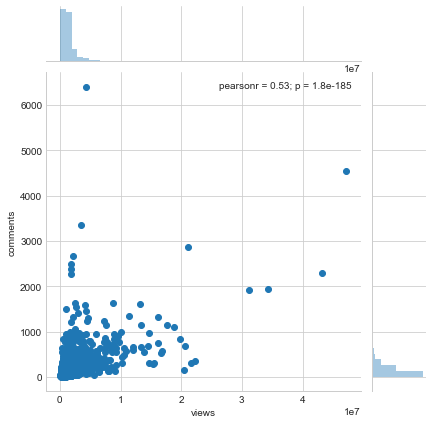

In [29]:
plt.figure(figsize=(15,10))
sns.jointplot(x='views', y='comments', data=data)
data[['views', 'comments']].corr()
data[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(20)

In [30]:
data['dis_quo'] = data['comments']/data['views']
data[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,01-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,13-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,01-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,09-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,02-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,09-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,07-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,17-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,10-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,03-11-2009


In [31]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [33]:
data['month'] = data['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_data = pd.DataFrame(data['month'].value_counts()).reset_index()
month_data.columns = ['month', 'views']

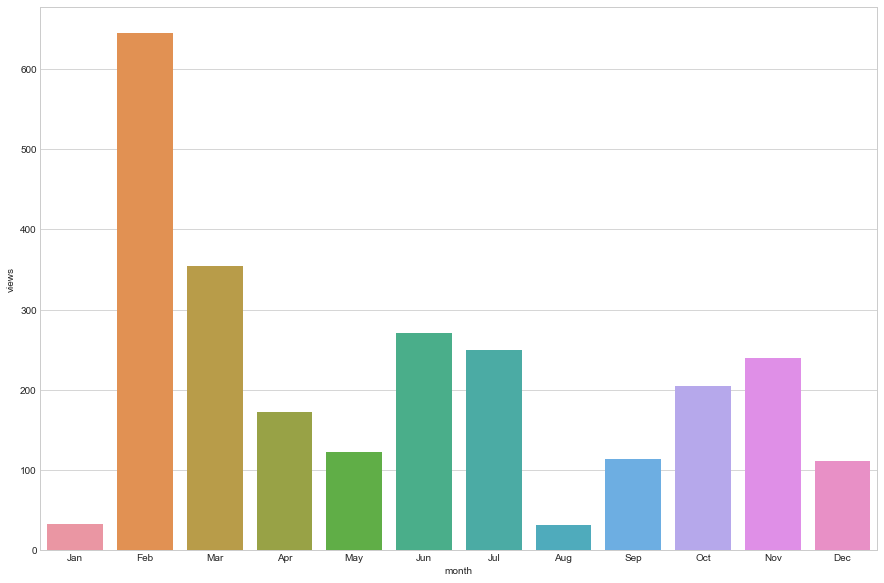

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x='month', y='views', data=month_data, order=month_order)

In [37]:
data['month'] = data['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_data = pd.DataFrame(data['month'].value_counts()).reset_index()
month_data.columns = ['month', 'talks']

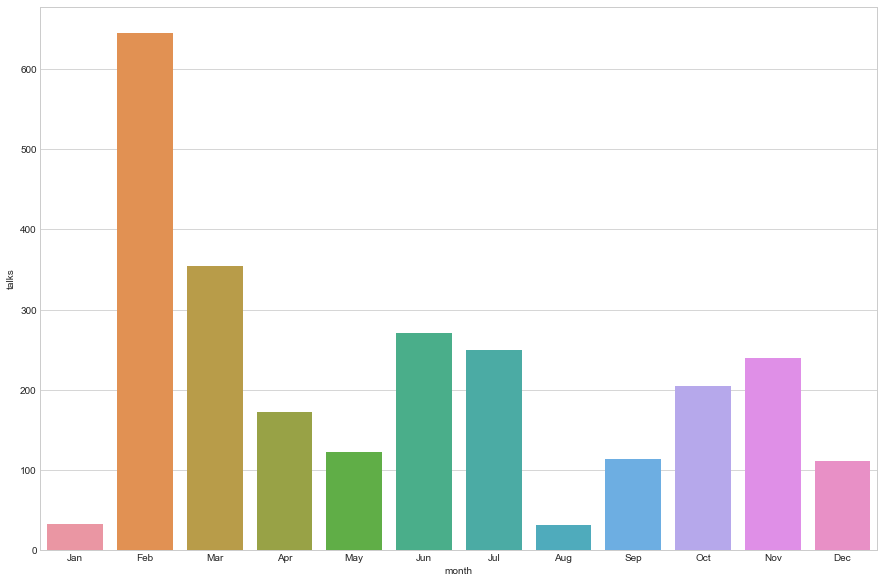

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(x='month', y='talks', data=month_data, order=month_order)

In [39]:
data['year'] = data['film_date'].apply(lambda x: x.split('-')[2])
year_data = pd.DataFrame(data['year'].value_counts().reset_index())
year_data.columns = ['year', 'talks']

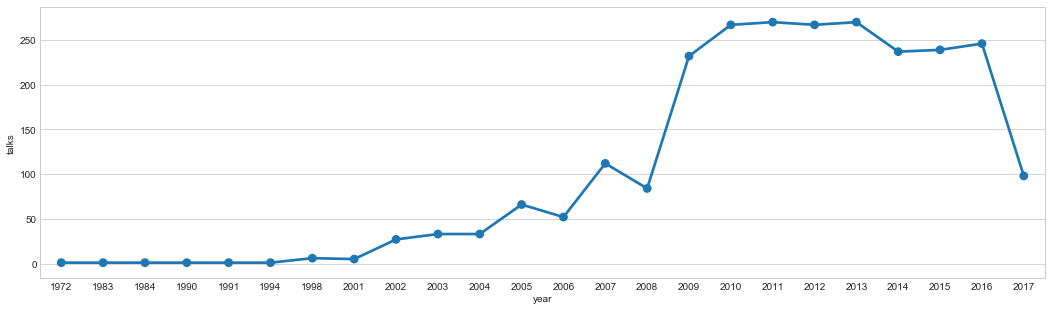

In [40]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_data)

In [41]:
data['year'] = data['film_date'].apply(lambda x: x.split('-')[2])
year_data = pd.DataFrame(data['year'].value_counts().reset_index())
year_data.columns = ['year', 'views']

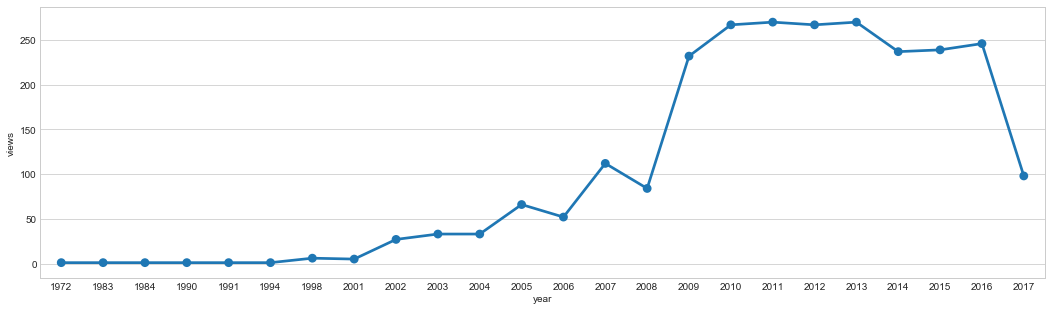

In [42]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='views', data=year_data)

In [43]:
#By Writer's Occupation
occupation_data = data.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_data.columns = ['occupation', 'appearances']
occupation_data = occupation_data.sort_values('appearances', ascending=False)

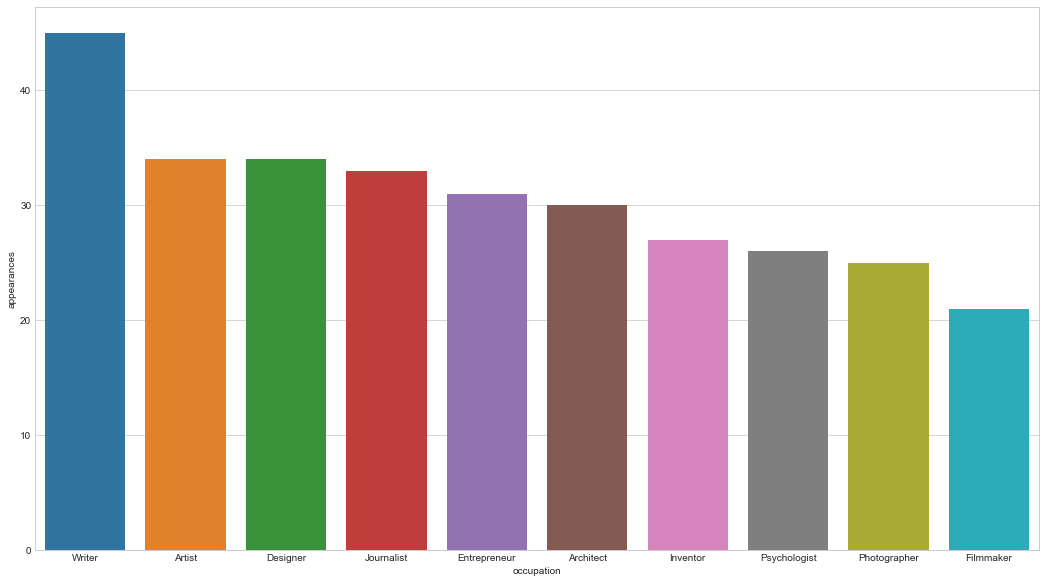

In [45]:
plt.figure(figsize=(18,10))
sns.barplot(x='occupation', y='appearances', data=occupation_data.head(10))
plt.show()

In [46]:
data['num_speaker'].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64